In [108]:
%load_ext autoreload
%autoreload 2

import os
import importlib
import pandas as pd 
import json
from qsprpred.data import QSPRDataset, RandomSplit
from qsprpred.models import QSPRModel
from qsprpred.data.descriptors.fingerprints import MorganFP
from qsprpred.data.descriptors.sets import SmilesDesc
from qsprpred.models import OptunaOptimization, TestSetAssessor, CrossValAssessor, SklearnModel
from qsprpred.data.sampling.splits import DataSplit
from qsprpred.data.processing.data_filters import RepeatsFilter, CategoryFilter
from qsprpred.models import EarlyStoppingMode
from sklearn.ensemble import GradientBoostingClassifier
from qsprpred.extra.gpu.models.chemprop import ChempropModel

from qsprpred.extra.gpu.models.dnn import DNNModel


import numpy as np
from typing import Iterable, List, Tuple

from typing import Literal
import sys
#sys.path.insert(0, '/home/ubuntu/implementation/QSPRpred')

import qsprpred.extra.gpu.models.gdnn as gdnn_module
#from importlib import reload
#
#reload(gdnn_module)

modname = 'qsprpred.extra.gpu.models.gdnn'
if modname in sys.modules:
    del sys.modules[modname]


from qsprpred.extra.gpu.models.gdnn import GGNN

#from qsprpred.extra.gpu.models.gdnn import DNNModel, GGNN
#print(DNNModel.__init__.__code__.co_varnames)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [130]:
from qsprpred.data.processing.feature_standardizers import SKLearnStandardizer
from sklearn.preprocessing import StandardScaler

# setting task as Classification, treshold is therefore crucial ("th") - has to be provided as a list of floats
dataset = QSPRDataset.fromTableFile(
    filename="../QSPRpred_tutorial_data/A2A_LIGANDS.tsv",
    sep="\t",
    store_dir="./tests/",
    name="TestGGNN",
    target_props=[{"name": "pchembl_value_Mean", "task": "REGRESSION", "th":None}],
    random_state=42
)

# dataset = dataset.sample(500)

dataset.prepareDataset(
    # split=RandomSplit(test_fraction=0.2,dataset=dataset),
    feature_calculators=[SmilesDesc()],
    # feature_standardizer=SKLearnStandardizer(StandardScaler())  # standardize features
)
# dataset.transformProperties(["pchembl_value_Mean"],lambda x:(x-np.mean(x))/np.std(x))
#dataset.prepareDataset()



In [ ]:
# import inspect
# import torch

# signature = inspect.signature(torch.optim.lr_scheduler.CosineAnnealingLR)
# {param.name: param.default for param in signature.parameters.values()}

{'optimizer': inspect._empty,
 'T_max': inspect._empty,
 'eta_min': 0,
 'last_epoch': -1,
 'verbose': 'deprecated'}

In [3]:
import torch
import torch.nn.functional as F


model = gdnn_module.DNNModel(
    base_dir='./tests/graph_models',
    name='TestGGNN',
    parameters={'in_feats': 74,
                'out_feats':74,
                'steps': 5,
                'n_hidden_layers':3,
                'dropout_rate':0.01,
                "batch_size":128,
                "n_epochs":10,
                "activation_in":"selu",
                "optim":"adam"
                },
    patience=5,
    tol=0.001,
    random_state=42
)

qsprpred - WARNING - Random state supplied, but alg <class 'qsprpred.extra.gpu.models.gdnn.GGNN'> does not support it. Ignoring this setting.


In [276]:
import seaborn as sns

,SMILES,pchembl_value_Mean,Year,QSPRID,pchembl_value_Mean_original
QSPRID,,,,,
TestGGNN_0000,Cc1cc(C)n(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n...,8.68,2008.0,TestGGNN_0000,8.68
TestGGNN_0001,Nc1c(C(=O)Nc2ccc([N+](=O)[O-])cc2)sc2nc3c(cc12...,4.82,2010.0,TestGGNN_0001,4.82
TestGGNN_0002,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,5.65,2009.0,TestGGNN_0002,5.65
TestGGNN_0003,CNC(=O)C12CC1C(n1cnc3c(NCc4cccc(Cl)c4)nc(C#CCC...,5.45,2009.0,TestGGNN_0003,5.45
TestGGNN_0004,CCCn1c(=O)c2c(nc3cc(OC)ccn32)n(CCCNC(=O)c2ccc(...,5.20,2019.0,TestGGNN_0004,5.20
...,...,...,...,...,...
TestGGNN_4077,CNc1ncc(C(=O)NCc2ccc(OC)cc2)c2nc(-c3ccco3)nn12,7.09,2018.0,TestGGNN_4077,7.09
TestGGNN_4078,Nc1nc(-c2ccco2)c2ncn(C(=O)NCCc3ccccc3)c2n1,8.22,2008.0,TestGGNN_4078,8.22
TestGGNN_4079,Nc1nc(CSc2nnc(N)s2)nc(Nc2ccc(F)cc2)n1,4.89,2010.0,TestGGNN_4079,4.89


6.894782260258728


<Axes: xlabel='pchembl_value_Mean', ylabel='Count'>

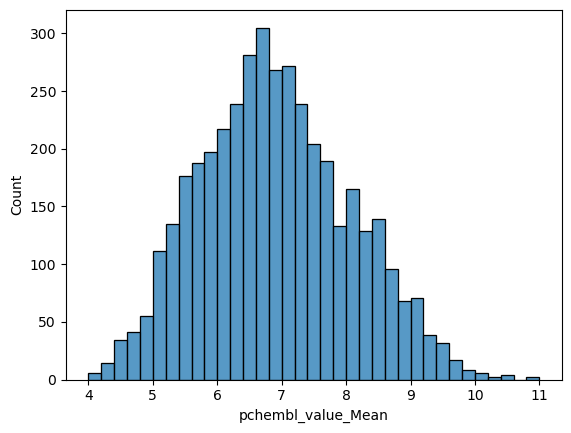

In [105]:
df = dataset.getDF()
display(df)
print(df["pchembl_value_Mean"].mean())
sns.histplot(df["pchembl_value_Mean"])

In [650]:
model.fitDataset(dataset,mode=EarlyStoppingMode.RECORDING)

GGNN updated
2
{'gamma': 0.95, 'step_size': 2}
Fitting...
{'step_size': 2, 'gamma': 0.95, 'last_epoch': -1, 'verbose': 'deprecated'}


'/mnt/c/Users/marti/OneDrive/Plocha/vscht/magister/treti_rocnik/mvi/mvi-sp/tests/graph_models/TestGGNN/TestGGNN_meta.json'

In [616]:
from sklearn.metrics import mean_squared_error, accuracy_score

In [614]:
print(model.predictDataset(dataset))

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [1]]


In [625]:
accuracy_score(df["pchembl_value_Mean"],model.predictDataset(dataset))

0.5688388045075943

<Axes: ylabel='pchembl_value_Mean'>

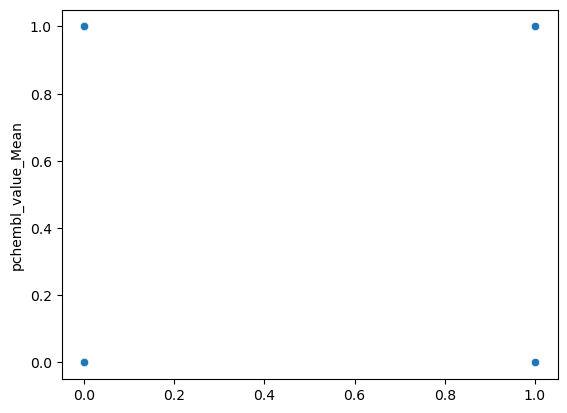

In [626]:
sns.scatterplot(x=model.predictDataset(dataset).flatten(),y=df["pchembl_value_Mean"])

In [314]:
yp = model.predictDataset(dataset)
np.sqrt(mean_squared_error(df["pchembl_value_Mean"],yp))

1.2922544569961585

In [ ]:
from rdkit import Chem
DATA = "../QSPRpred_tutorial_data/A2A_ligands.tsv"

df = pd.read_csv(DATA, sep=",")

mols = [Chem.MolFromSmiles(smi) for smi in df["SMILES"].values]

df["MW"] = [Chem.Descriptors.ExactMolWt(mol) for mol in mols]

In [74]:
d = {
    "SMILES":["CCC","CC","CCO","CO"],
    "MW":[44,30,46,31]
}
df = pd.DataFrame(d,columns=["SMILES","MW"],index=range(4))

In [23]:
df

,SMILES,MW
0,CCC,44
1,CC,30
2,CCO,46
3,CO,31


In [100]:
# setting task as Classification, treshold is therefore crucial ("th") - has to be provided as a list of floats
dataset = QSPRDataset(
    df=df,
    store_dir="./tests/",
    name="TestGGNN",
    target_props=[{"name": "MW", "task": "REGRESSION", "th":None}],
    random_state=42
)

dataset = dataset.sample(25)


# dataset.transformProperties(["MW"],lambda x:(x-np.mean(x))/np.std(x))
dataset.prepareDataset(
    # split=RandomSplit(test_fraction=0.2,dataset=dataset),
    feature_calculators=[SmilesDesc()],
    #feature_standardizer=SKLearnStandardizer(StandardScaler())  # standardize features
)

In [131]:
model = gdnn_module.DNNModel(
    base_dir='./tests/graph_models',
    name='TestGGNN',
    parameters={'in_feats': 150,
                'out_feats':150,
                'steps': 1,
                'n_hidden_layers':4,
                'dropout_rate':0.01,
                "batch_size":128,
                "n_epochs":500,
                "activation_in":"leaky_relu",
                "optim":"adam",
                "optim_lr":1e-3
                },
    patience=50,
    tol=0.0001,
    random_state=42
)

qsprpred - WARNING - Random state supplied, but alg <class 'qsprpred.extra.gpu.models.gdnn.GGNN'> does not support it. Ignoring this setting.


415.92857076368006


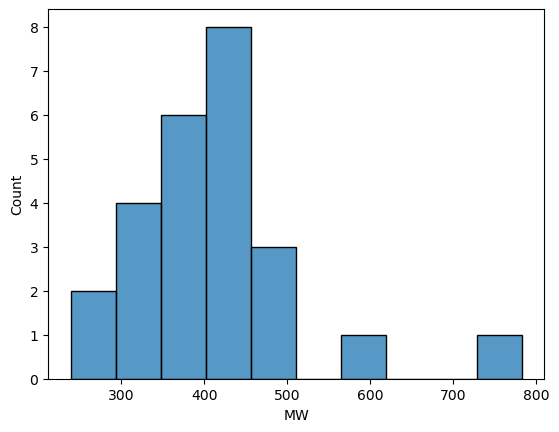

In [102]:
import seaborn as sns

sns.histplot(dataset.getDF()["MW"])
print(dataset.getDF()["MW"].mean())

In [132]:
CrossValAssessor("r2",mode=EarlyStoppingMode.RECORDING, split=RandomSplit(test_fraction=0.3,dataset=dataset))(model,dataset)

GGNN updated
Fitting...
Standard dev: 0.0008661968185474567
Standard dev: 0.0008785237497609164
Standard dev: 0.000900556839544811
Val loss: 5.444752375284831
Standard dev: 0.00010183610114623766
Standard dev: 0.00010343259866279537
Standard dev: 0.00010932678506992865
Val loss: 1.54646102587382
Standard dev: 8.351999557860951e-05
Standard dev: 8.317618219409053e-05
Standard dev: 8.751225820516813e-05
Val loss: 1.150277574857076
Standard dev: 8.281460931412843e-05
Standard dev: 8.175037749574379e-05
Standard dev: 8.361186793379224e-05
Val loss: 1.153865138689677
Standard dev: 8.749918173382037e-05
Standard dev: 8.443357172694564e-05
Standard dev: 8.348367408093528e-05
Val loss: 1.1503198544184368
Standard dev: 8.631571089993628e-05
Standard dev: 8.394297866277368e-05
Standard dev: 8.376005241101072e-05
Val loss: 1.1509569485982258
Standard dev: 8.728497215701355e-05
Standard dev: 8.469703590075911e-05
Standard dev: 8.473739618260959e-05
Val loss: 1.1506640513737996
Standard dev: 8.8333

array([0.5556103])

In [133]:
model.fitDataset(dataset)

GGNN updated
Fitting...


'/mnt/c/Users/marti/OneDrive/Plocha/vscht/magister/treti_rocnik/mvi/mvi-sp/tests/graph_models/TestGGNN/TestGGNN_meta.json'

In [134]:
yp = model.predictDataset(dataset)

In [137]:
dataset.getDF().shape

(4082, 5)

In [136]:
yp.shape

(4082, 1)

In [129]:
TestSetAssessor('r2')(model,dataset)

GGNN updated
Fitting...
Standard dev: 0.00045409034316296314
Standard dev: 0.0004514675470297499
Standard dev: 0.0004356982877437192
Val loss: 6.165701866149902
Standard dev: 0.00012565395843677757
Standard dev: 0.00014176258835175843
Standard dev: 0.00011423939246902092
Val loss: 1.993054469426473
Standard dev: 0.0001120942076817594
Standard dev: 0.00012623662253445427
Standard dev: 0.00010162687157651448
Val loss: 1.3079861799875896
Standard dev: 0.00011179213216551042
Standard dev: 0.00012589493504831654
Standard dev: 0.00010146968408412358
Val loss: 1.2826343774795532
Standard dev: 0.00011206818580735676
Standard dev: 0.00012616983535505895
Standard dev: 0.00010174774954028249
Val loss: 1.2828323046366374
Standard dev: 0.00011229120368900895
Standard dev: 0.00012664091949308128
Standard dev: 0.00010222510577151971
Val loss: 1.283897837003072
Standard dev: 0.00011382384552078288
Standard dev: 0.00012856737745498906
Standard dev: 0.00010372662752825679
Val loss: 1.2839889129002888
St

array([0.53157367])

<Axes: xlabel='pchembl_value_Mean'>

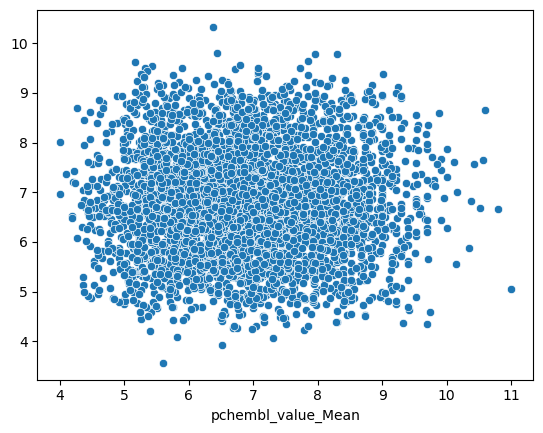

In [135]:
sns.scatterplot(x=dataset.getDF()["pchembl_value_Mean"],y=yp.flatten())